In [3]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.shape

(5728, 2)

In [6]:
data['text'][0] 

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [7]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [8]:
import seaborn as sns

In [9]:
sns.countplot(data['spam'])

c:\Users\91866\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1280: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data


In [ ]:
data.duplicated().sum()

33

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
data.shape

(5695, 2)

In [ ]:
5728 - 33

5695

c:\python 3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='spam', ylabel='count'>

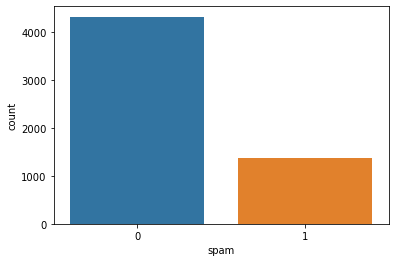

In [ ]:
sns.countplot(data['spam'])

In [ ]:
data['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

# Separate in X and Y

In [ ]:
X = data['text'].values
y = data['spam'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Train - Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [ ]:
X_train.shape

(4556,)

In [ ]:
X_test.shape

(1139,)

In [ ]:
y_train.shape

(4556,)

In [ ]:
y_test.shape

(1139,)

# Preprocessing 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [ ]:
x_train.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
len(x_train.toarray()[0])

33126

# Training by ML Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
x_test = cv.transform(X_test)

In [ ]:
len(x_test.toarray())

1139

In [ ]:
len(x_test.toarray()[0])

33126

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.990342405618964

In [ ]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.995171202809482

# Lets test using some emails

In [ ]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [ ]:
clean_email = cv.transform(email)

In [ ]:
len(clean_email.toarray()[0])

33126

In [ ]:
check = nb.predict(clean_email)[0]

In [ ]:
check

0

# Evaluation Function

In [ ]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!
